# Let's look at suicide rate trends by various demographics

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [179]:
x = df.groupby('generation')['suicides_no'].sum()
xx = df.groupby('generation')['suicides/100k pop'].mean()

y = df.groupby('age')['suicides/100k pop'].sum()

z = df.groupby('country')['suicides_no'].sum()
zz = df.groupby('country')['suicides/100k pop'].mean()

w = df.groupby('country').filter(lambda df: df['suicides_no'].sum() > 300000).groupby('country')['suicides_no'].mean()
ww = df.groupby('country').filter(lambda df: df['suicides_no'].sum() > 300000).groupby('country')['suicides/100k pop'].mean()

a = df['gdp_per_capita ($)']
b = df['suicides/100k pop']

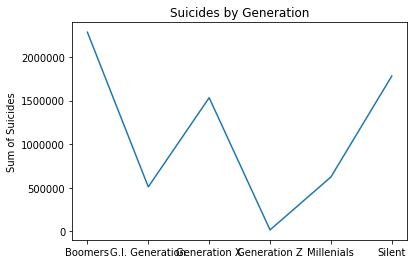

In [113]:
plt.plot(x)
plt.ylabel('Sum of Suicides')
plt.title('Suicides by Generation')
plt.show()

#### See subplot below for analysis

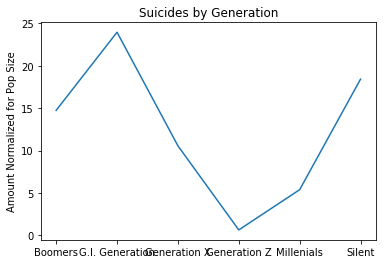

In [116]:
plt.plot(xx)
plt.ylabel('Amount Normalized for Pop Size')
plt.title('Suicides by Generation')
plt.show()

### See subplot below for analysis

Text(0.5, 1.0, 'Suicide Rate by Generation')

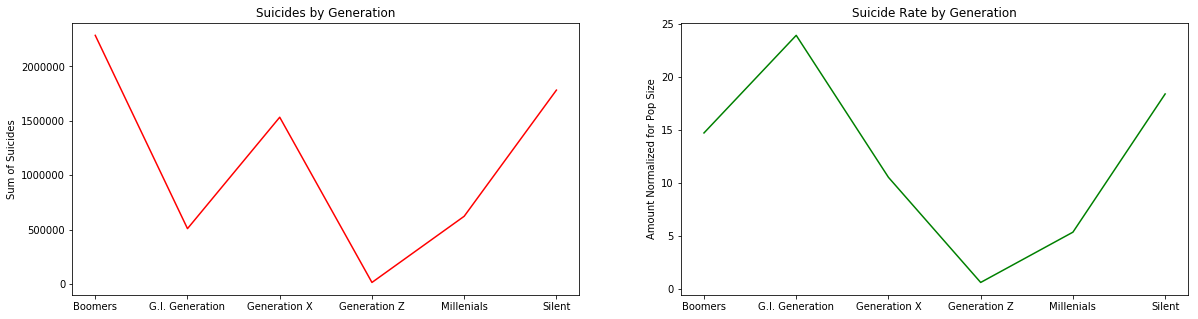

In [134]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.plot(x, c='r')
plt.ylabel('Sum of Suicides')
plt.title('Suicides by Generation')

plt.subplot(1,2,2)
plt.plot(xx, c='g')
plt.ylabel('Amount Normalized for Pop Size')
plt.title('Suicide Rate by Generation')

### Total suices for G.I. generation appears low but when normalized for generation size, it is the largest. 

### Also, it appears the boomer generation has the largest number of suicides simply becuase it is the largest generation in population.

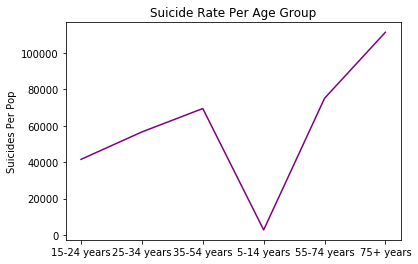

In [130]:
plt.plot(y, color='purple')
plt.ylabel('Suicides Per Pop')
plt.title('Suicide Rate Per Age Group')
plt.show()

### It's interesting to note that the suicide rate appears to linearly increase with increasing age. 

### I wonder if this is in relation to the way deaths are accounted for in different countries.

### I also wonder how to sort my groups by increasing brackets; ages 5-14 puts the trend out of context.

Text(0.5, 1.0, 'Measure of Countries by Suicide Rate')

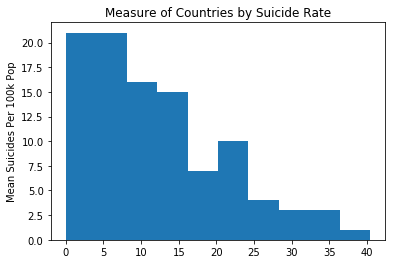

In [189]:
plt.hist(zz)
plt.ylabel('Mean Suicides Per 100k Pop')
plt.title('Measure of Countries by Suicide Rate')

### Most places have low suicide rates

### I wonder what differentiates those countries that have up to 7 fold suicide rates of the mode (35 per 100k pop vs 5 per 100k pop)

Text(0.5, 1.0, 'Suicide Rate by Country')

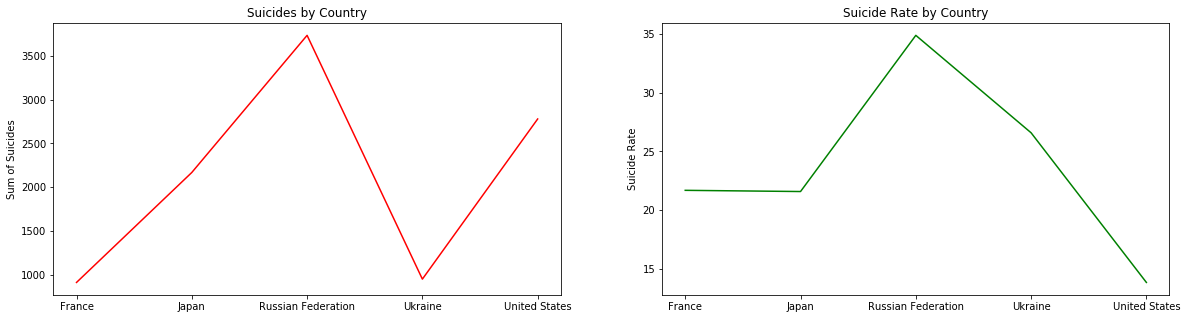

In [167]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.plot(w, c='r')
plt.ylabel('Sum of Suicides')
plt.title('Suicides by Country')

plt.subplot(1,2,2)
plt.plot(ww, c='g')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by Country')

### It appears that France and Ukraine do better than the US if you compare total suicedes; however, if normalized for population size, US ranks last of the top 5 countries with most suicides.

### Russia has both the most suicides in total number and after normalized for population size.

Text(0.5, 1.0, 'Suicide Rate vs GDP')

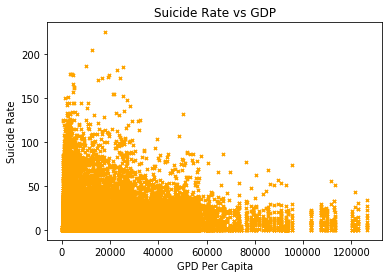

In [188]:
plt.scatter(a, b, marker='x', s=10, color='orange')
plt.xlabel('GPD Per Capita')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs GDP')

### There is an exponential decrease in suicide rate as GDP of the country increases.

### There also appears to be a law of diminishing returns as GDP reaches a sufficient level it no longer influences suicide rate positively. 

### I wonder if it is safe to indicate that suicide rate is dependent on other factors for countries with larger GDP's.